<h1 style="text-align: center;"> <b> Time Series Analysis using Python (Notes) <h1>

<h2 style="text-align: center;"> <b> BY: Arun Kumar 🤗 <h2>

<img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/07/2020-07-30.png ">

## Import the packages

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

## Examining the data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting the data

In [7]:
import matplotlib.pyplot as plt

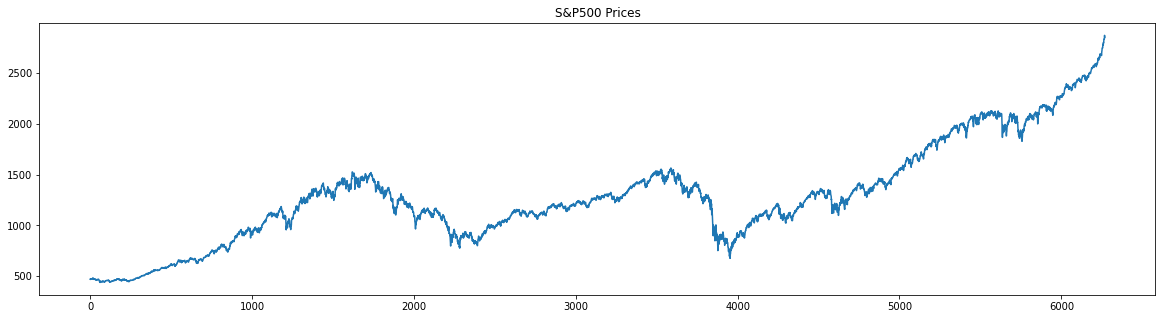

In [8]:
df_comp["spx"].plot(figsize=(20,5),title = "S&P500 Prices")
plt.show()

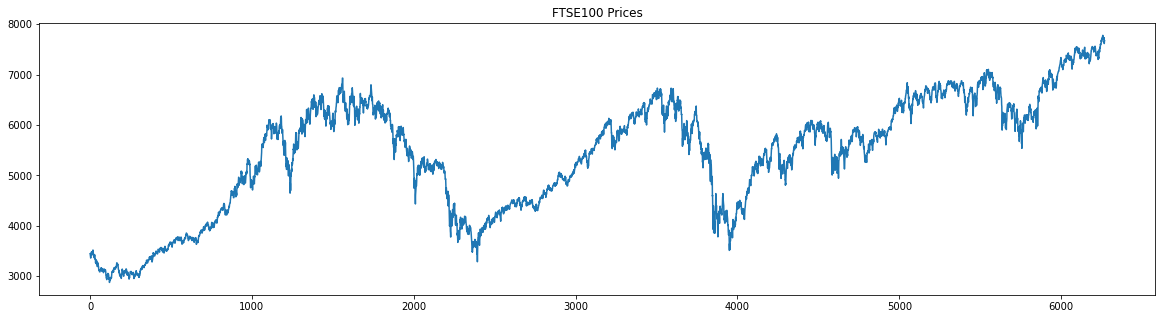

In [9]:
df_comp["ftse"].plot(figsize=(20,5),title = "FTSE100 Prices")
plt.show()

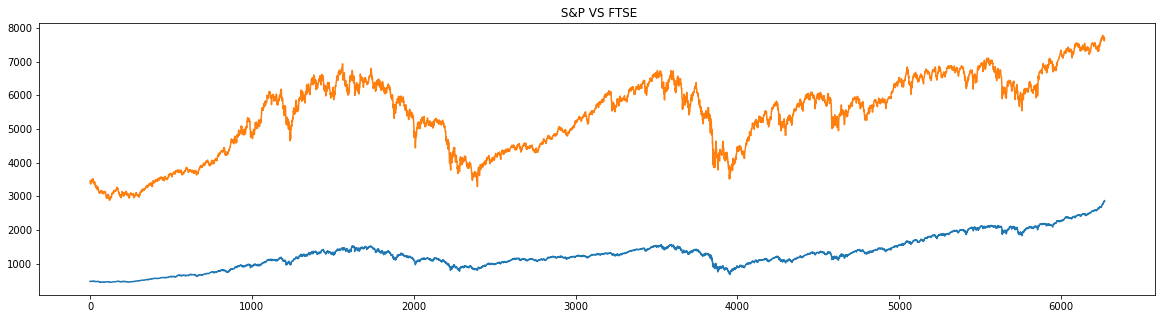

In [10]:
df_comp["spx"].plot(figsize=(20,5),title = "S&P500 Prices")
df_comp["ftse"].plot(figsize=(20,5),title = "FTSE100 Prices")
plt.title(" S&P VS FTSE")
plt.show()

## The QQ Plot

In [11]:
import scipy.stats
import pylab

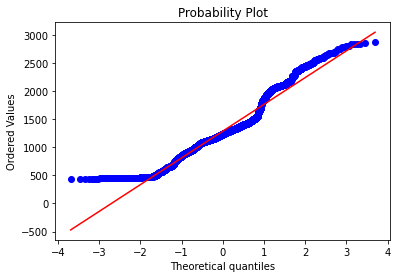

In [12]:
scipy.stats.probplot(df_comp["spx"], plot= pylab)
pylab.show()

## Length of the Time Period

In [13]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [14]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [15]:
df_comp["date"].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

## From Text to Date

In [16]:
df_comp['date']  = pd.to_datetime(df_comp["date"], dayfirst = True)

In [17]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df_comp["date"].describe()

count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

In [19]:
df_comp.set_index("date", inplace = True)

In [20]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [21]:
df_comp = df_comp.asfreq('b')                 # 'b' stands for Bussiness days

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [23]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [24]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df_comp["spx"] = df_comp["spx"].fillna(method = "ffill")       # front filling

In [26]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [27]:
df_comp["ftse"] = df_comp["ftse"].fillna(method = "bfill")       # back filing

In [28]:
df_comp["dax"] = df_comp["dax"].fillna(value = df_comp["dax"].mean())

In [29]:
df_comp["nikkei"] = df_comp["nikkei"].fillna(value = df_comp["nikkei"].mean())

In [30]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifing the Dataset

In [31]:
df_comp['market_value'] = df_comp['spx']

In [32]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [33]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [34]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the data

### Training set - 'df'
### Testing set - 'df_test

In [35]:
size = int(len(df_comp)*0.8)

In [36]:
df = df_comp.iloc[:size]

In [37]:
df_test = df_comp.iloc[size:]

In [38]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [39]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White Noice

In [40]:
wn = np.random.normal(loc = df['market_value'].mean(), scale = df['market_value'].std(), size = len(df) )

In [41]:
df['wn'] = wn

In [42]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.644471
std,292.559287,289.705758
min,438.920000,-146.498454
25%,914.620000,888.834471
50%,1144.650000,1086.059476
75%,1316.280729,1282.738252
max,1570.252238,2043.541887


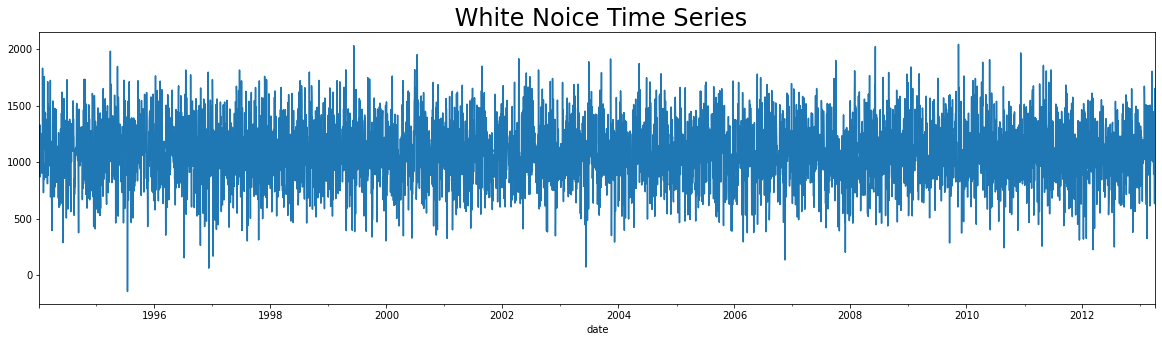

In [43]:
df['wn'].plot(figsize = (20,5))
plt.title(' White Noice Time Series', size = 24)
plt.show()

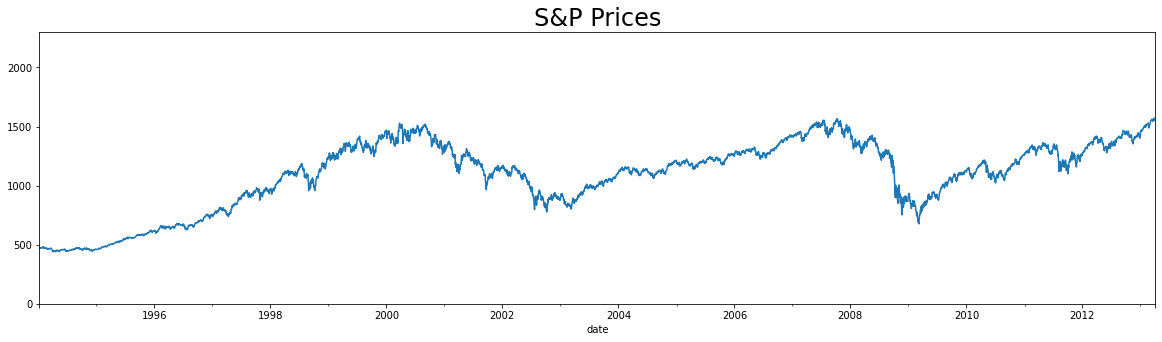

In [44]:
df['market_value'].plot(figsize = (20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0, 2300)
plt.show()

## Random Walk

In [45]:
rw = pd.read_csv("RandWalk.csv")
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [46]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [47]:
df['rw'] = rw['price']

In [48]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1087.356409,1122.139662
1994-01-10,475.27,1228.208516,1080.347860
1994-01-11,474.13,1329.121440,1082.095245
1994-01-12,474.17,868.615162,1083.639265
1994-01-13,472.47,1204.147810,1067.146255


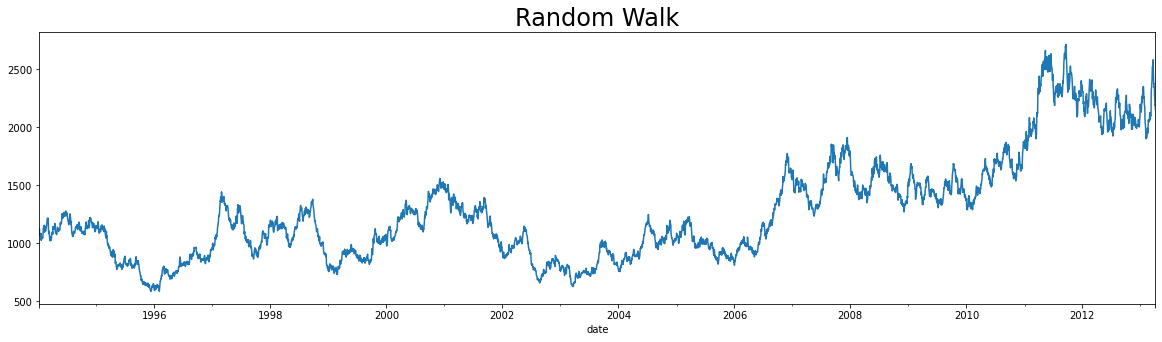

In [49]:
df['rw'].plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

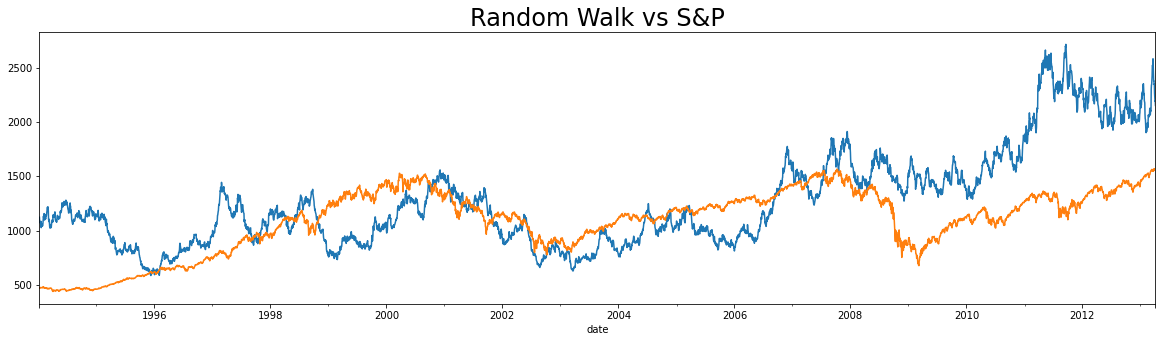

In [50]:
df['rw'].plot(figsize = (20,5))
df['market_value'].plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

## Stationarity

In [51]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns
sns.set()

In [52]:
sts.adfuller(df['market_value'])

(-1.7369847452352465,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [53]:
sts.adfuller(df['wn'])

(-50.926849925305234,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70717.26238595674)

In [54]:
sts.adfuller(df['rw'])

(-1.3286073927689734,
 0.6159849181617376,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

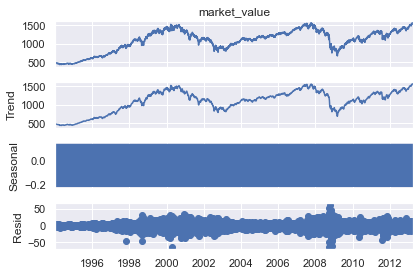

In [55]:
s_dec_additive = seasonal_decompose(df['market_value'], model = "additive")
s_dec_additive.plot()
plt.show()

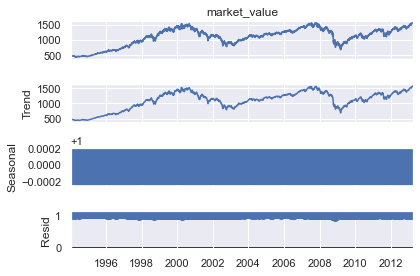

In [56]:
s_dec_multiplicative = seasonal_decompose(df['market_value'], model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Autocorrelation Function (ACF) plot

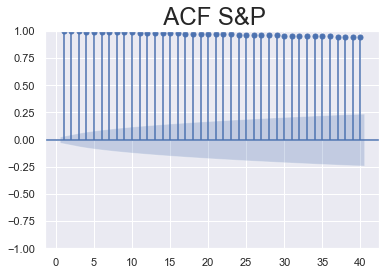

In [57]:
sgt.plot_acf(df['market_value'], lags = 40, zero = False)
plt.title(" ACF S&P", size = 24)
plt.show()

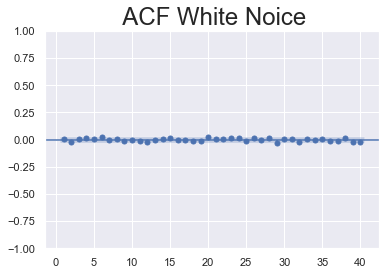

In [58]:
sgt.plot_acf(df['wn'], lags = 40, zero = False)
plt.title(" ACF White Noice", size = 24)
plt.show()

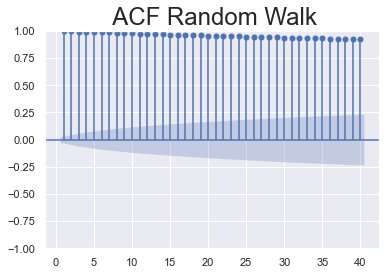

In [59]:
sgt.plot_acf(df['rw'], lags = 40, zero = False)
plt.title(" ACF Random Walk", size = 24)
plt.show()

## Partial Autocorrelation Function (PACF) Plot

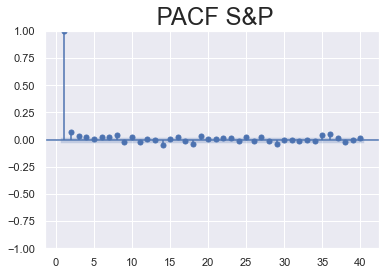

In [60]:
sgt.plot_pacf(df['market_value'], lags = 40, zero = False, method = ('ols'))
plt.title(" PACF S&P", size = 24)
plt.show()

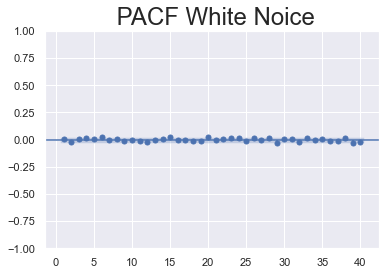

In [61]:
sgt.plot_pacf(df['wn'], lags = 40, zero = False, method = ('ols'))
plt.title(" PACF White Noice", size = 24)
plt.show()

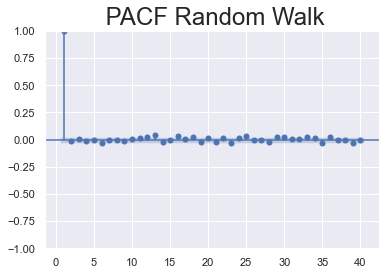

In [62]:
sgt.plot_pacf(df['rw'], lags = 40, zero = False, method = ('ols'))
plt.title(" PACF Random Walk", size = 24)
plt.show()

## The AR(1) Model

In [63]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

ImportError: numpy.core.multiarray failed to import

In [ ]:
model_ar = ARIMA(df['market_value'], order=(1,0,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
